# Sentiment Analysis Project for Amazon Products Reviews

In this project, we will use 3 datasets which contain Amazon customers’ reviews from 3 types of products: **fine food, cell phones, and musical instruments**. 

Since the 3 dataset have both ratings and reviews from customers, analyzing them will give profound insights as to how customers feel about the service that Amazon provides for each type of product. In the program we will **implement sentiment analysis to find out how positive/negative the reviews are**.

We will utilize nltk (Natural Language Toolkit) package to calculate the negative, positive, and compound score of the reviews. Then, we will visualize the result using the compound score with the ratings (from 1 to 5) to see the correlation between ratings and the positivity/negativity of the reviews. In that way, we can objectively assess the customers’ experience with the product. 

---

In [1]:
import pandas as pd
import os
import os.path
import json
import csv

import matplotlib.pyplot as mpl
import numpy as np

datadir = os.getcwd()

In [2]:
import matplotlib as plt

---

# Part A: Parsing Data

**1.** The first data set is the reviews and rating scores retrieved from Amazon website for fine food. In this data set, we will use 4 columns: `ProductId` (the ID each product has on Amazon), `Score` (ranging from 1-5, the score customers give for their experience with the service and products they buy), `Summary`(summary of the reviews customers wrote on Amazon website), and `Text`(the raw text of customers' reviews)

We read the `Fine food.csv` file and build it into a DoL. Then we use the DoL to build a `DataFrame` named `food_data`. Finally, we eliminate unnecessary columns using `.pop()`

When parsing this data set, we used `split(',')` to split and order the information. However, since our data have texts in it, using `split` messed up all the columns as it goes to split comma in inside the quote marks. Thus, we switched to use `csv.reader` (which is in the csv module) to avoid spliting commas inside the quote marks. `csv.reader()` takes `file`, `quotechar` (the quote marks that we would to avoid splitting commas inside them), and `delimiter` as parameters. 

In [3]:
filepath1 = os.path.join(datadir,"Fine food.csv")

with open(filepath1, 'r') as file:
    d = {}
    headers = file.readline().strip().split(',')
    for title in headers: 
        d[title] = []
    for line in csv.reader(file, quotechar='"', delimiter = ','): #avoid splitting commas inside the quote marks
        for i, header in enumerate(headers):
            d[header].append(line[i])

#eliminate unneccessary columns
d.pop('Id')
d.pop('ProfileName')
d.pop('HelpfulnessNumerator')
d.pop('Time')
food_data = pd.DataFrame(d)
food_data.head(10)

,ProductId,UserId,HelpfulnessDenominator,Score,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,5,Great taffy,Great taffy at a great price. There was a wid...
5,B006K2ZZ7K,ADT0SRK1MGOEU,0,4,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,B006K2ZZ7K,A1SP2KVKFXXRU1,0,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,B006K2ZZ7K,A3JRGQVEQN31IQ,0,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,B000E7L2R4,A1MZYO9TZK0BBI,1,5,Yay Barley,Right now I'm mostly just sprouting this so my...
9,B00171APVA,A21BT40VZCCYT4,0,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...


**2.** The seacond is the reviews and rating scores retrieved from Amazon website for cell phones products. In this data set, we will use 4 columns: `asin` (the ID each product have), `rating` (ranging from 1-5, the score customers give for their experience with the service and products they buy), `title`(summary of the reviews customers wrote on Amazon website), and `body`(the raw text of customers' reviews) 

We read the file `20191226-reviews.csv` and build it into a LoL named `l`. We then use the LoL `l` to build a `DataFrame` and store it as `data_cells`.

When parsing this data, we also had the same problem with when we parsed `Fine food.csv`. We also switched to use `csv.reader` instead to split commas properly.

In [4]:
filepath2 = os.path.join(datadir,"20191226-reviews.csv")

with open(filepath2, 'r') as file:
    l = []
    headers = file.readline().strip().split(',')
    for line in csv.reader(file, quotechar='"', delimiter = ','): #use .reader from csv module to ignore the comma in quotes
        l.append(line)
        
cells_data = pd.DataFrame(l, columns = headers)
cells_data.head(10)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",false,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",false,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17
2,B0000SX2UC,Brooke,5,"December 30, 2003",false,Love This Phone,"This is a great, reliable phone. I also purcha...",5
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",false,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",false,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1
5,B0000SX2UC,J. White,4,"September 25, 2005",false,Worked great for me,"Hello, I have this phone and used it until I d...",
6,B0000SX2UC,the cell phone store owner,5,"April 16, 2004",false,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2
7,B0000SX2UC,Matt,4,"April 3, 2004",false,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that...",2
8,B0000SX2UC,Charles Cook,5,"November 24, 2003",false,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this...",7
9,B0000SX2UC,Amazon Customer,3,"February 2, 2004",false,Pissed off-a little bit,ok well im in school and i need the text messa...,3


**3.** The seacond is the reviews and rating scores retrieved from Amazon website for musical instruments on Amazon. In this data set, we will use 4 columns: `asin` (the ID each product have), `rating` (ranging from 1-5, the score customers give for their experience with the service and products they buy), `summary`(summary of the reviews customers wrote on Amazon website), and `reviewText`(the full text of customers' reviews) 

We read this `.json` using `pd.read_json`. We passed in the argument `lines=True` so that the code will eliminate the trailing data in the file. We store the `DataFrame` as `data_ins`

In [5]:
filepath3 = os.path.join(datadir,"Musical_Instruments_5.json")
ins_data = pd.read_json(filepath3, lines=True) #add lines argument to eliminate trailing chars
ins_data.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


**Questions explained:**

Looking at our data sets, we raise 2 questions for our study:
1. Which type of product receives the most positive review using sentiment scores?

2. What about the products/services they like the most?(Finding the most common adjectives and nouns to see how people actually feel about the products)

For the first question, we would like to know, out of 3 product types (cell phones, musical instruments, and fine food) which one receive the most positive feedbacks. This could be used to study retailing which product type is the strength of Amazon at the time being. 

For the second question, we want to understand more comprehensively about customers feelings about the products they bought via the reviews they wrote on Amazon website. Aside from rating scores, customers' reviews can reveal considerably about what customers truly like about the products and what about the products that still make them feel unsatified. By interpreting their reviews, we can undersatnd which aspects we need to improve or further enhance.

**Why do we think these questions are interesting?** Answering these questions helps we understand retailing which products is currently the strength of Amazon that needs to be further improved. Analyzing specifically customers' reviews helps comprehend what about the products that people are talking mostly about and how they actually feel about the products. Knowing this, we can come up with a strategy to improve shortcomings and further enhance qualified services. 

---

### Data citation:

Amazon Fine Food Reviews (csv): 
J. McAuley and J. Leskovec. From amateurs to connoisseurs: modeling the evolution of user expertise through online reviews. WWW. 2013.
https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
Amazon reviews: Cell Phone Reviews (csv):
Amazon.com.Puppeteer.https://www.kaggle.com/datasets/grikomsn/amazon-cell-phones-reviews?select=20191226-reviews.csv  
(Datasets are retrieved (scraped) from Amazon.com search results using automation scripts with Puppeteer)
Amazon Musical Instruments Reviews (json):
Julian McAuley. Amazon Product Data. UCSD. 2018.
https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews


---

# Part B: Clean and process data

## 1. Tidy and concatenate data

Clean `food_data`, `ins_data`, and `cells_data`

In [6]:
food_data.head(5)

,ProductId,UserId,HelpfulnessDenominator,Score,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,5,Great taffy,Great taffy at a great price. There was a wid...


In order to tidy the 3 data frames, we first eliminate unnecessary columns and reorder the columns. In doing so, we are able to concatenate the 3 dataframe later on. 

In [27]:
food_tidy = food_data.iloc[:, [0,3,4,5]] 
ins_data.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


After dropping some unecessary columns, we renamed the columns of the `cells_data_tidy` and `ins_data_tidy` according to `food_data_tidy` columns (`UserId`, `Text`, `Summary`, and `Score`)

In [32]:
ins_tidy = ins_data.iloc[:, [1,5,6,4]]
ins_tidy = ins_tidy.rename(columns = {'asin':'ProductId',
                            'reviewText':'Text',
                            'summary':'Summary',
                            'overall':'Score'}, inplace =False)
ins_tidy.head(10)
cells_data.head(10)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",false,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",false,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17
2,B0000SX2UC,Brooke,5,"December 30, 2003",false,Love This Phone,"This is a great, reliable phone. I also purcha...",5
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",false,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",false,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1
5,B0000SX2UC,J. White,4,"September 25, 2005",false,Worked great for me,"Hello, I have this phone and used it until I d...",
6,B0000SX2UC,the cell phone store owner,5,"April 16, 2004",false,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2
7,B0000SX2UC,Matt,4,"April 3, 2004",false,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that...",2
8,B0000SX2UC,Charles Cook,5,"November 24, 2003",false,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this...",7
9,B0000SX2UC,Amazon Customer,3,"February 2, 2004",false,Pissed off-a little bit,ok well im in school and i need the text messa...,3


In [34]:
cells_tidy = cells_data.iloc[:, [0,2,5,6]] #reorder the columns 
cells_tidy = cells_tidy.rename(columns = {'asin':'ProductId',
                                          'body':'Text',
                                          'title':'Summary',
                                           'rating':'Score'}, inplace =False)
cells_tidy.head(10)

,ProductId,Score,Summary,Text
0,B0000SX2UC,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...
1,B0000SX2UC,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...
2,B0000SX2UC,5,Love This Phone,"This is a great, reliable phone. I also purcha..."
3,B0000SX2UC,3,"Love the Phone, BUT...!","I love the phone and all, because I really did..."
4,B0000SX2UC,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...
5,B0000SX2UC,4,Worked great for me,"Hello, I have this phone and used it until I d..."
6,B0000SX2UC,5,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...
7,B0000SX2UC,4,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that..."
8,B0000SX2UC,5,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this..."
9,B0000SX2UC,3,Pissed off-a little bit,ok well im in school and i need the text messa...


After we have 3 tidy data frame `food_tidy`, `cells_tidy`, and `ins_tidy`, we **concatenate the 3 data sets with the types of products specified.** 
We merged 3 data sets using concatenation method with with group keys to seperate 3 different types of products. Seperating the reviews for different products helps find out which type of products receive the most positive/negative feedbacks. 

The **result** for this the this part is the `reviews_tidy` data sets that contains data from 3 data sets we used.


In our tidy data table, we have `Type` and `ProductId` as our independent variables. `Score`, `Summary` and `Text` are dependent variables. 

We want to set `Type` as a column in our `DataFrame` so that we can easily filter later on. When reseting the index, we realized that, with our data set, if we use `inplace=True`, the `reset_index` will change our `Text` column values into series and messed up all the following code. Therefore, we chose to change into `inplace=False`.

In [35]:
reviews = pd.concat([food_tidy, ins_tidy, cells_tidy], axis = 0, keys = pd.Index(['Fine food', 'Musical instrument', 'Cell phones'], name = 'Type'))
reviews_tidy = reviews.reset_index(level = 'Type', inplace = False)
reviews_tidy.head(10)

,Type,ProductId,Score,Summary,Text
0,Fine food,B001E4KFG0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Fine food,B00813GRG4,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,Fine food,B000LQOCH0,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,Fine food,B000UA0QIQ,2,Cough Medicine,If you are looking for the secret ingredient i...
4,Fine food,B006K2ZZ7K,5,Great taffy,Great taffy at a great price. There was a wid...
5,Fine food,B006K2ZZ7K,4,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,Fine food,B006K2ZZ7K,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,Fine food,B006K2ZZ7K,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,Fine food,B000E7L2R4,5,Yay Barley,Right now I'm mostly just sprouting this so my...
9,Fine food,B00171APVA,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...


---

## 2. Generate bar charts to visualize the distribution of overall ratings

### a. Filter data

In this project, we wish to see how customers feel about Amazon 3 types of products: musical instruments, fine food, and cell phones. We will first **visualize the distribution of overall ratings** customers give for each type of products using bar charts. 

We will seperate data for fine food, cell phones, and musical instruments using `loc` to draw bar chart for each product type.

In [11]:
reviews_food = reviews_tidy.loc[reviews_tidy.Type == 'Fine food', :]
reviews_cells = reviews_tidy.loc[reviews_tidy.Type == 'Cell phones', :]
reviews_ins = reviews_tidy.loc[reviews_tidy.Type == 'Musical instrument', :]

In this program, we use `.plot` of `pandas` to draw graph. We first use `.value_counts()` to get a series containing counts of unique values in `Score` column. We store the series as a variable `value_count`

We find use guide for `.value_counts()` in https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html?highlight=value_counts#pandas.Series.value_counts 

To draw bar chart, we use `Series.plot` in pandas. `plot` makes plot out of the `Series`. 

We find use guide for `Series.plot` in https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html 

5    37752
1    12743
4     8824
3     4752
2     3915
Name: Score, dtype: int64

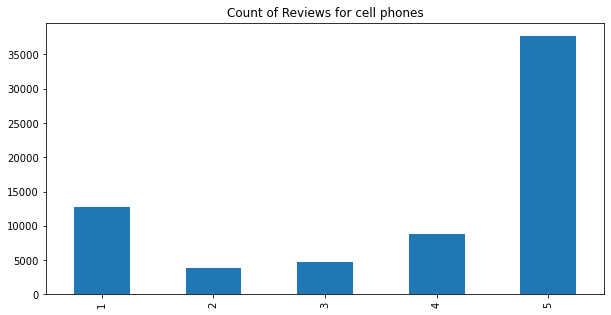

In [12]:
value_count = reviews_cells['Score'].value_counts()

value_count.sort_index().plot(kind = 'bar', 
                              title = "Count of Reviews for cell phones", 
                              x = 'Score',
                              y = 'Frequency',
                              figsize = (10, 5))
value_count

#### Analysis:
The bar chart shows that most of the ratings are 5-score. However, there are still many 1-score ratings (12743 ratings) for cell phones products. 

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

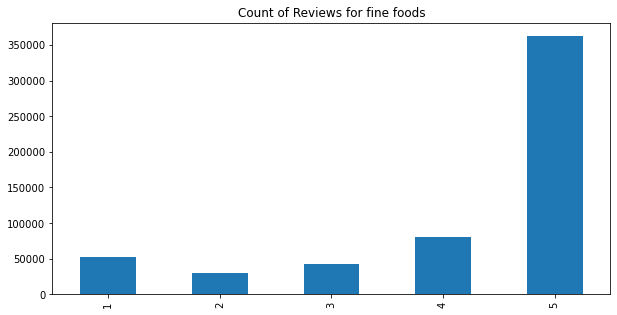

In [13]:
value_count = reviews_food['Score'].value_counts()
value_count.sort_index().plot(kind = 'bar', 
                              title = "Count of Reviews for fine foods",      
                              figsize = (10, 5))
value_count

#### Analysis:
The bar chart shows the distribution for score ratings for fine food products. Similar to the other 2 product types, most of rating for fine food are 5-score. 

5    6938
4    2084
3     772
2     250
1     217
Name: Score, dtype: int64

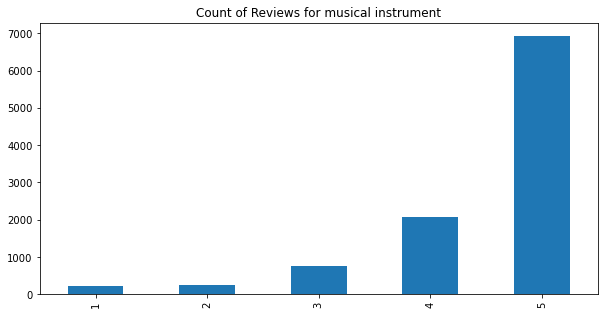

In [14]:
value_count = reviews_ins['Score'].value_counts()

value_count.sort_index().plot(kind = 'bar', 
                              title = "Count of Reviews for musical instrument",
                              figsize = (10, 5))
value_count

The bar chart shows that for musical instrument products, there are just a few 1-score ratings. The majority of the ratings are 5-score which shows that customers are quite satisfied with musical instruments provided by Amazon. 

Find mean values of each type of products. Because `reviews_ins['Score']`, `reviews_cells['Score']`, and `reviews_food['Score']` is a series, we cannot apply `int()` on them. Therefore, we use `series.astype(int)` instead to convert the data type of the seires into integer. In doing so, we can calculate the sentiment scores for reviews later. 

In [15]:
reviews['Score'] = reviews['Score'].astype(int) 
score_mean = reviews.groupby(by = 'Type').agg({'Score':'mean'})
score_mean

,Score
Type,
Fine food,4.183199
Musical instrument,4.488744
Cell phones,3.807916


The mean ratings scores show that out of 3 types of product Amazon provides, musical instruments' customers are most likely to be satisfied what they bought. 

## Part C: Analyze data sets using Natural Language Tool Kit

In this part, we use nltk (Natural Language Tool Kit) library to calculate the score for sentiment intensity of review texts in the data set. Reference for this package, we find at: https://www.nltk.org/api/nltk.html 

To be able to use nltk package, we first need to download the package we need to use for this project. To do so, we use the code `nltk.download()`. There will be a window opened for us to choose which package we will download. In this project, we downloaded `stopwords`, `nltk.sentiment`, `nltk.corpus` package for our analysis. 

In [16]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

From `nltk.sentiment` we import `SentimentIntensityAnalyzer` module to calculate sentiment intensity score. To assess the sentiment intensity of a text, there are negativity, positivity, and compound score. For this study, we use compound score only as a measure for the sentiment intensity of reviews.

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
positive sentiment : (compound score >= 0.05) 
neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
negative sentiment : (compound score <= -0.05)

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer #import from nltk.sentiment module the SentimentIntensityAnalyzer

#create a SentimentIntensityAnalyzer object to calculate review sentiment intensity as sia
sia = SentimentIntensityAnalyzer() 

Below is the code we use to calculate for compound scores representing sentiment intensity of the reviews. The `polarity_scores` takes a string of text as parameter and returns a dictionary with 3 keys `neg` (for negativity scores), `pos` (for positivity score), and `compound` (for compound score). We append all compound scores in `compound` list to add it to our `DataFrame`.

In [18]:
compound = []
for i in range(len(reviews['Text'])):
    score = sia.polarity_scores(reviews['Text'][i])
    compound.append(score['compound'])

[0.9441,
 -0.5664,
 0.8265,
 0.0,
 0.9468,
 0.883,
 0.9346,
 0.9487,
 0.6369,
 0.8313,
 0.9746,
 -0.7579,
 0.296,
 0.9466,
 0.6486,
 0.5719,
 0.7481,
 0.8883,
 0.8957,
 0.6077,
 0.6249,
 0.9153,
 0.7687,
 0.2617,
 0.3939,
 0.0,
 -0.296,
 0.5956,
 0.9913,
 0.9746,
 0.9713,
 0.9153,
 0.7103,
 0.9779,
 0.9091,
 0.7622,
 0.9196,
 0.4457,
 0.7638,
 0.8114,
 0.9301,
 0.9435,
 0.9441,
 0.9161,
 0.8421,
 0.0,
 0.9169,
 0.4404,
 0.747,
 0.2363,
 -0.5448,
 0.9194,
 -0.8259,
 -0.3612,
 0.8761,
 0.8908,
 0.908,
 0.91,
 0.9323,
 0.8807,
 0.4404,
 0.8442,
 0.0,
 0.9817,
 0.8674,
 0.5165,
 0.492,
 -0.9116,
 -0.0096,
 -0.7345,
 0.2228,
 0.9733,
 0.9787,
 0.9665,
 0.2263,
 0.1098,
 0.5647,
 0.8303,
 0.7814,
 0.8636,
 0.9098,
 0.9041,
 0.9957,
 0.8642,
 0.8431,
 0.9487,
 0.8797,
 0.7424,
 0.9716,
 0.9554,
 0.7351,
 0.6249,
 0.8255,
 0.9882,
 0.0,
 0.9273,
 0.982,
 0.7729,
 0.5106,
 -0.5267,
 0.7717,
 0.2285,
 0.9287,
 0.7249,
 0.9313,
 0.9603,
 0.5719,
 0.9503,
 0.9116,
 0.9841,
 0.0176,
 0.8769,
 0.994

In [19]:
reviews['Compound'] = compound #add compound score list to our DataFrame
reviews.head(5)

ProductId  Score                Summary  \
Type                                                    
Fine food 0  B001E4KFG0      5  Good Quality Dog Food   
          1  B00813GRG4      1      Not as Advertised   
          2  B000LQOCH0      4  "Delight" says it all   
          3  B000UA0QIQ      2         Cough Medicine   
          4  B006K2ZZ7K      5            Great taffy   

                                                          Text name  Compound  
Type                                                                           
Fine food 0  I have bought several of the Vitality canned d...  NaN    0.9441  
          1  Product arrived labeled as Jumbo Salted Peanut...  NaN   -0.5664  
          2  This is a confection that has been around a fe...  NaN    0.8265  
          3  If you are looking for the secret ingredient i...  NaN    0.0000  
          4  Great taffy at a great price.  There was a wid...  NaN    0.9468

After adding `Compound` column to our `DataFrame`, we aggregate the mean compound score for each type of products to find out which product type receive the most positive reviews.

In [20]:
compound_mean = reviews.groupby(by = 'Type').agg({'Compound': ['mean']})
compound_mean

,Compound
,mean
Type,
Fine food,0.647316
Musical instrument,0.640075
Cell phones,0.359953


Overall, customers' feedbacks for 3 Amazon reviews are positive. However, customers feedbacks for cell phones products on Amazon are not as positive as fine foods and musical instruments products. Looking back at our bar charts, cell phones are the product types that has the percent of receiving 1-score ratings higher than the other 2 product types. 

At the end of our project, we want to see what customers talk most about the products they bought and how they feel about them. In order to do that, we generate wordclouds to see what are the most frequently used nouns and adjectives in their reviews. 

To generate wordcloud, we use the library wordcloud. In wordcloud we use WordCloud module. In a reviews, there will be several stopwords such as I, am, and be. We will utilize the `stopwords` package in nltk to eliminate them from the reviews. Since we are working with reviews on Amazon, there are links in texts that Python will notes with `href` or `br`. We will update our stopwords set to include these also. `stopwords` of nltk does not include special character such as ".", "," and "\". I will create a list of special characters to eliminate them from text later on so that those characters will not mess up the tokenize process.

In [21]:
from wordcloud import WordCloud
from nltk.corpus import stopwords #import stopwords to eliminate those words from our reviews
stopwords = set(stopwords.words('english'))#store the stopwords in nltk pakage in a variable
custom_stopwords = {'br', 'href'}
stopwords.update(custom_stopwords)
special_char = [',','.',';',':','*','&','!','/']

reference source for nltk package: https://www.nltk.org/api/nltk.html

First, we filter out data according to product types

In [22]:
text_food = reviews_tidy.loc[reviews_tidy['Type'] == 'Fine food', :]
text_ins = reviews_tidy.loc[reviews_tidy['Type'] == 'Musical instrument', :]
text_cells = reviews_tidy.loc[reviews_tidy['Type'] == 'Cell phones', :]
text_ins = text_ins.head(10)
text_cells = text_cells.head(10)
text_food = text_food.head(10)

0    Not much to write about here, but it does exac...
1    The product does exactly as it should and is q...
2    The primary job of this device is to block the...
3    Nice windscreen protects my MXL mic and preven...
4    This pop filter is great. It looks and perform...
5    So good that I bought another one.  Love the h...
6    I have used monster cables for years, and with...
7    I now use this cable to run from the output of...
8    Perfect for my Epiphone Sheraton II.  Monster ...
9    Monster makes the best cables and a lifetime w...
Name: Text, dtype: object

Since all the reviews are now `Series` in `DataFrame`, we write a function to combines all strings in a series into a large string so that we can tokenize and apply wordcloud on it.

In [23]:
def ser_to_str(series):
    '''
    combine all the rows in the series passed in and return a string 
    
    Args:
      series (series): a series needs to be converted to 1 long string
    
    Return:
      string (str): of all the elements in the series
    '''
    text_str = ''
    for t in series:
        text_str = text_str + t + ' '
    return text_str

food_str = ser_to_str(text_food['Text'])
ins_str = ser_to_str(text_ins['Text'])
cells_str = ser_to_str(text_cells['Text'])
ins_str

"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing, The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :] The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or h

As we plan to find what people care most about products/service and their feelings using them, we will tokenize our texts and filter out adjectives and nouns. we write `tokenize` function that will tokenize and filter one chosen word type only. The function takes `string` and `word_type` as parameters and returns string that only contains words of a specific word type

In nltk, words are clasified and labeled known as POS-tagging, for example, "NN" stands for noun and "JJ" stands for adjective. For more reference, we find at https://www.nltk.org/api/nltk.tag.html

In [24]:
def tokenize(string, word_type):
    '''
    Filter out and return string with only chosen word types
    
    Args:
      string (str): string that need to be filtered
      word_type (str): chosen word type
      
    Return:
      res_str: string that only contains specifically chosen type of words.
    '''
    words_token = nltk.word_tokenize(string)
    for w in words_token:
        for s in stopwords:
            if w.lower() == s:
                words_token.remove(w)
        for c in special_char:
            if w == c:
                words_token.remove(w)
    #words_token
    tag = nltk.pos_tag(words_token)
    #tag
    res = []
    for t in tag:
        if t[1] == word_type:
            res.append(t)
    res_str = ''
    for e in range(len(res)):
        res_str = res_str + res[e][0] + ' '
    return res_str

noun_food_str = tokenize(food_str, 'NN')
noun_ins_str = tokenize(ins_str, 'NN')
noun_cells_str = tokenize(cells_str, 'NN')

adj_food_str = tokenize(food_str, 'JJ')
adj_ins_str = tokenize(ins_str, 'JJ')
adj_cells_str = tokenize(cells_str, 'JJ')

In order to generate wordclouds, we write a function `wordcloud` that takes a string as parameter and generate wordcloud for that string. We use `matplotlib` module for wordcloud. Before we an generate `wordcloud`, we have to install wordcloud in our terminal using the command `pip install wordcloud`. we use `WordCloud().generate()` to generate wordcloud out of a string and `matplotlib` to draw the wordcloud. 

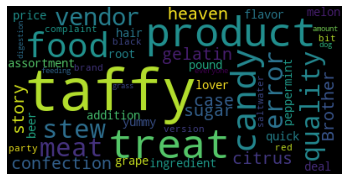

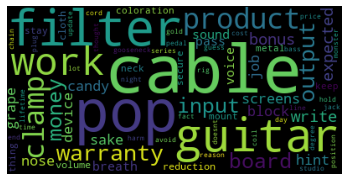

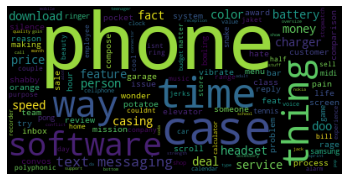

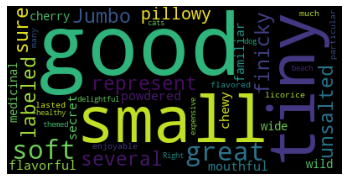

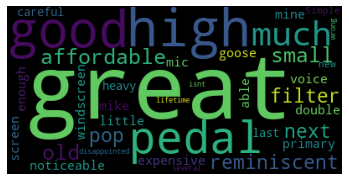

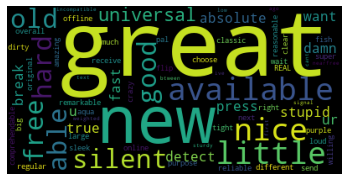

In [25]:
def wordcloud(s):
    '''
    generate a wordcloud shows the frequency of words in string s
    
    Args:
      s (str): string that need to be converted to wordcloud
    
    Return: None
    
    Output: a wordcloud shows the frequency of words in string s
    '''
    wordcloud = WordCloud().generate(s)
    mpl.imshow(wordcloud)
    mpl.axis('off')
    mpl.show(wordcloud)
wordcloud(noun_food_str)
wordcloud(noun_ins_str)
wordcloud(noun_cells_str)

wordcloud(adj_food_str)
wordcloud(adj_ins_str)
wordcloud(adj_cells_str)

---

# Part D: Analysis

By using `.mean()` and `groupby` method in pandas, we are able to find out which type of products on Amazon that have most of the customers hihgly rated. Accoridng to the result for mean sentiment compound scores we have above for 3 different types of product,  people are highly likely satisfied with ... Amazon provided. 

By visualizing some most frequently used words in the customers reviews on wordcloud allows us to find out what people care most about 3 Amazon products when it come to feedbacks. 

 - For fine food, people talk much about taffy, candy and citrus. They also talks about meat. However, there are quite more words that related to candy or sweet treats such as peppermint and sugar. 
 - For musical instruments, customers care about guitar, cable, clamp and blocknoise. 
 - For cell phones, a majority of customers feedbacks are about software, text messaging, battery, price, and feature. 
 
Moving to the second wordcloud for adjectives, we see that for the fine food most of the customers think they are good and great about the food they bought through Amazon. However, when it come to the wordcloud of cell phones, we can see one adjective stands out that is affordable. Customers talks much about the affordability of cell phones sold by Amazon. In the wordcloud for musical instruments, 'new'/'old' is what people care about. 

On finsishing this project, we successfully answer the 2 central questions we have raised when looking at the data sets in the beginning. However, we still see many limits in our prediction. Looking further forwards, to gain more meaningful predictions from the data sets we collected, we can program to find to seperate the reviews with low compound scores and reviews with high compound scores. Then, we are able to understand what people hate/love most about the products and services. 

Overall, this project helps us practice our knowledge about pandas and apply it to process real untidy large data sets. Throughout the project, we learn how to utilize pandas to gain information we need in the data set. Furthermore, by choosing a sentiment analysis project, we learn more about what is library, package, and module as we have to look up for methods and syntax to implement our analysis. 